# Глава 6. Гистограмы

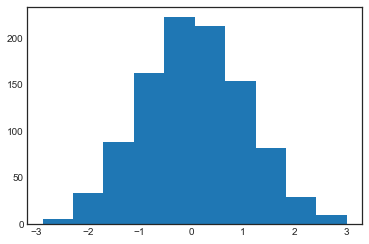

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

plt.hist(data); # простой вызов гистограмы

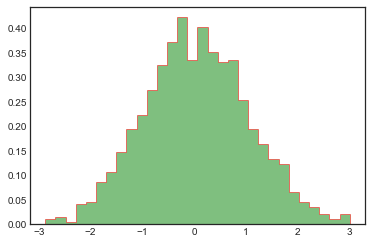

In [19]:
# несколько аргументов plt.hist, отстальные в документации
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='green',
         edgecolor='red');
plt.hist?

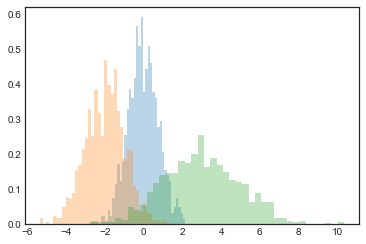

In [10]:
# пример сравнения нескольких гистограм
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

# удобный способ передачи одинаковых настроек нескольким методам
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

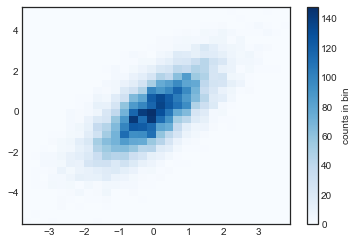

In [21]:
# еще есть двумерные гистограмы plt.hist2d

mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

# полный список аргументов в документации

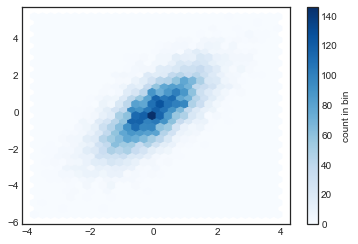

In [26]:
# и ещё есть двумерные гисторамы с шестиугольными ячейками - plt.hexbin
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

# Глава 7. Настройка легенды графика

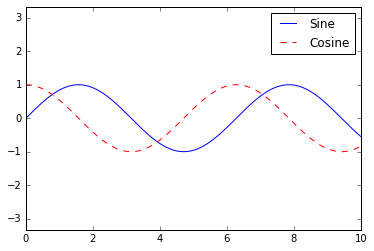

In [34]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

# простой способ кастомизации легенды через ООП интерфейс матплотлиба
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

# fig, ax = plt.subplots() это краткая запись этого:
# fig = plt.figure()
# ax = fig.add_subplot()
# используется чтоб можно было изменить атрибуты фигуры если захочется

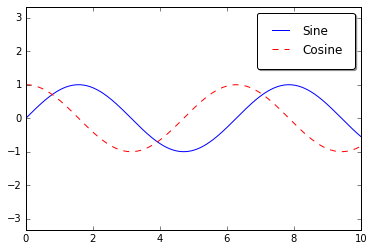

In [38]:
# добавили "квадратную коробочку" вокруг легенды, тень и обводку
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

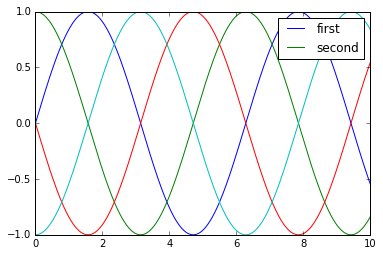

In [39]:
# мы можем задавать что именно отображать в легенде (по ум-ию подписывается все)

y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# передаем список линий которые хотим подписать и их имена
# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

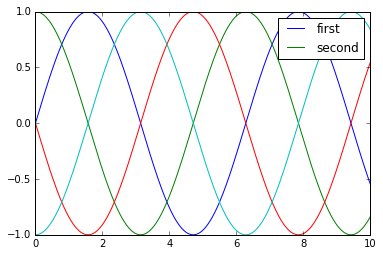

In [40]:
# еще можно задавать каждую линию отдельно и давать ей имя если мы хотим её подписать
# неподписанные линии в легенде не отображаются

plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

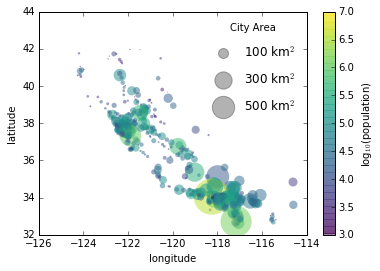

In [54]:
# если мы используем plt.scatter() и размер маркеров связан с нашими данными и
# мы хотим указать эти размеры в легенде, то это можно сделать "нарисовав"
# подписанные данные без entries


import pandas as pd
cities = pd.read_csv('Data_folder/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd'] # lattitude, longtitude
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None, c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7) # set color limits of the current image


# вот тут весь фокус, создаем "пустые" маркеры и подписываем их (да, костыль)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], color='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area');

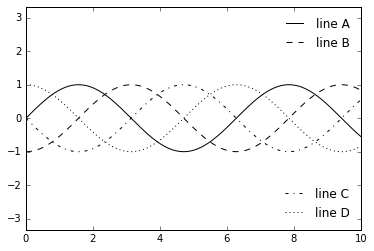

In [55]:
# т.к. matplotlib - старый кусок хлама, в нем нельзя отобразить две легенды
# человеческими способами, поэтому опять костыли:
# я даже разбирать это говно не буду, пусть тут просто валяется и все, мб когда-
# -нибудь встречу это в чьём-то коде и по этому образцу пойму что челик сделал


fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);